# <font color='red'> <b>Importing Libraries </b><font color='black'>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

# <font color='red'> <b>Combining DataFrames</b><font color='black'>

**Difference between merge, join, and concatenate;**

**with concat() ;**

- We can combine vertically and horizontally.

- We can combine two or more dataframes at the same time.

- It does not have to be a common column.

- We can combine both row and column based. So "axis" only exists in concat().

We can do horizontal merging with **concat(), join() and merge()**.

We can join two or more dataframes at the same time in **join()**, but we can join at most two dfs if they have the same column names.

**with merge() ;**

- We can combine two dataframes at the same time.

- We do our merging via the common column.

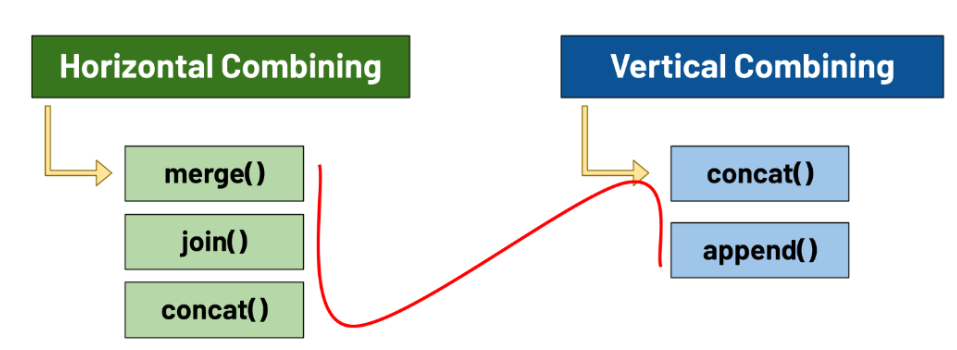

In [4]:
one = pd.DataFrame({
   'name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

two = pd.DataFrame({
   'name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])

## <font color='yellow'> <b>concat()</b><font color='black'>

**concat()** is used to concatenate two or more DataFrames based on rows or columns.

It can be used to combine different data sets into the same data set or to add new columns or rows to the data set.

No common columns are required between datasets.
    
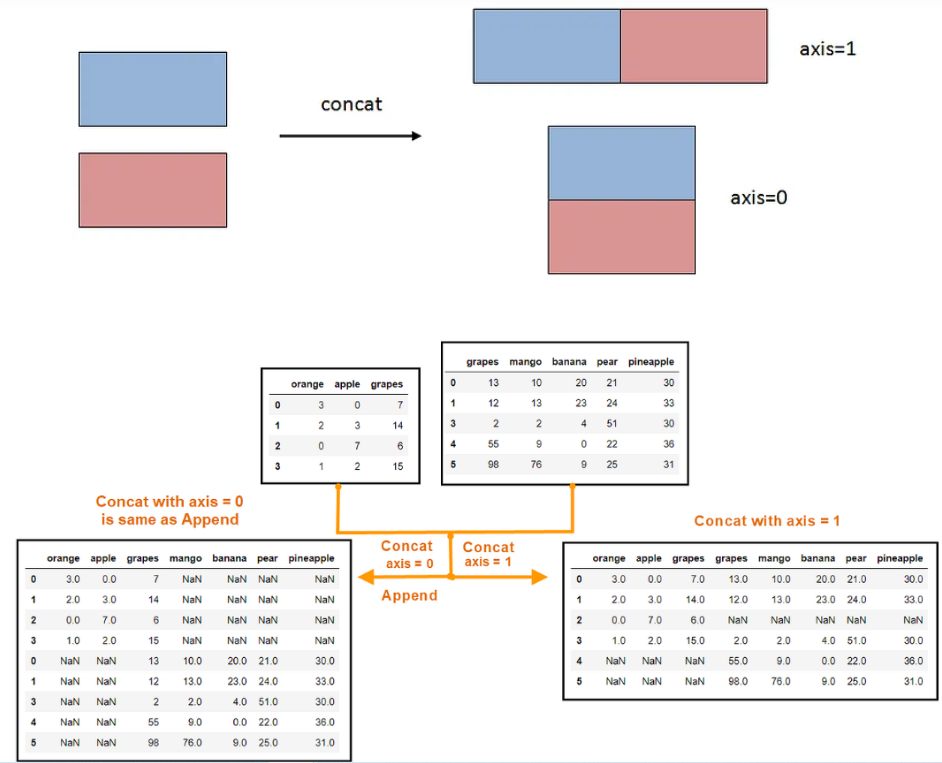

In [4]:
# We dont have to have a common column, 
# It is possible to concat using axis 0 or 1 .

In [5]:
one

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78


In [6]:
two

,name,subject_id,marks_scored
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [7]:
pd.concat([one,two]) 
# number of rows increased 
# , default axis is 0 

,name,subject_id,marks_scored
1,Alex,sub1,98
2,Amy,sub2,90
3,Allen,sub4,87
4,Alice,sub6,69
5,Ayoung,sub5,78
1,Billy,sub2,89
2,Brian,sub4,80
3,Bran,sub3,79
4,Bryce,sub6,97
5,Betty,sub5,88


In [ ]:
pd.concat([one,two], ignore_index=True) 
# to ignore the previous indexes from data set
# ir creates a new indexes starting from 0

,name,subject_id,marks_scored
0,Alex,sub1,98
1,Amy,sub2,90
2,Allen,sub4,87
3,Alice,sub6,69
4,Ayoung,sub5,78
5,Billy,sub2,89
6,Brian,sub4,80
7,Bran,sub3,79
8,Bryce,sub6,97
9,Betty,sub5,88


In [7]:
pd.concat([one, two], axis=1)
# is not a very sensible concatination 

,name,subject_id,marks_scored,name,subject_id,marks_scored
1,Alex,sub1,98,Billy,sub2,89
2,Amy,sub2,90,Brian,sub4,80
3,Allen,sub4,87,Bran,sub3,79
4,Alice,sub6,69,Bryce,sub6,97
5,Ayoung,sub5,78,Betty,sub5,88


In [ ]:
pd.concat([one,two], axis=1, ignore_index=True)
# Since the axis is 1 , it ignores the column names and gives index numbers 

,0,1,2,3,4,5
1,Alex,sub1,98,Billy,sub2,89
2,Amy,sub2,90,Brian,sub4,80
3,Allen,sub4,87,Bran,sub3,79
4,Alice,sub6,69,Bryce,sub6,97
5,Ayoung,sub5,78,Betty,sub5,88


## <font color='yellow'> <b>merge()</b><font color='black'>

**merge()** is the process of combining two or more data sets based on a common column.

Based on the values in common columns, data is combined and a single dataset is created.

merge() is frequently used to complete missing or different values in a dataset or to combine different data sources.
    
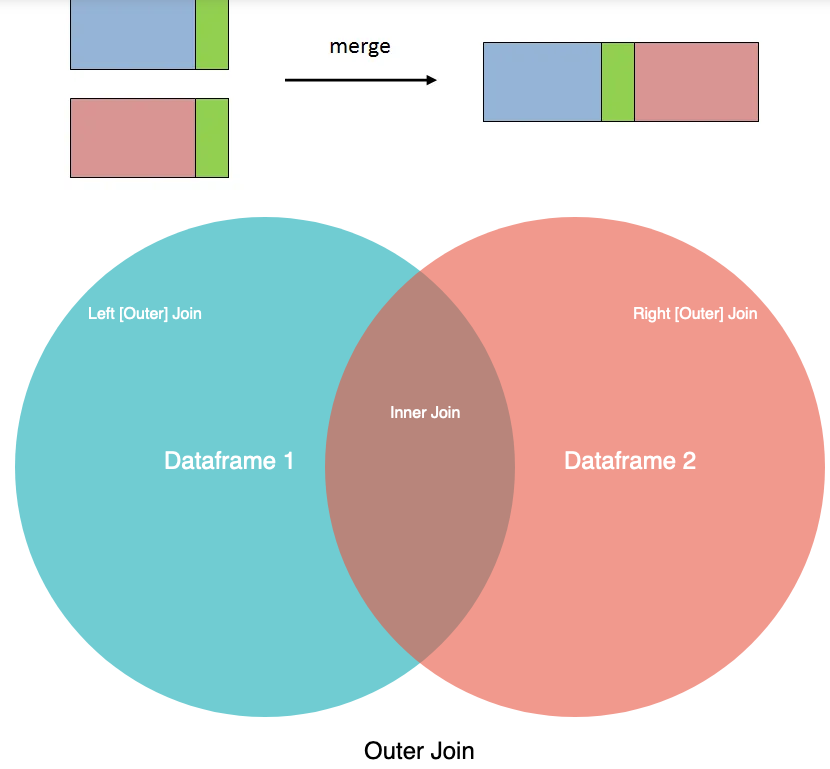
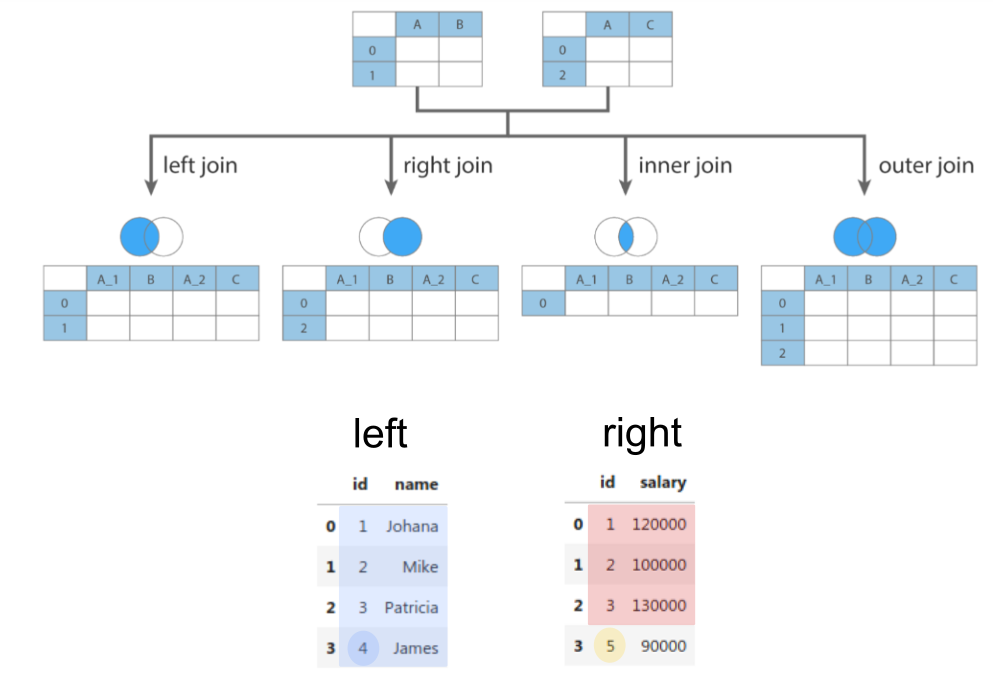
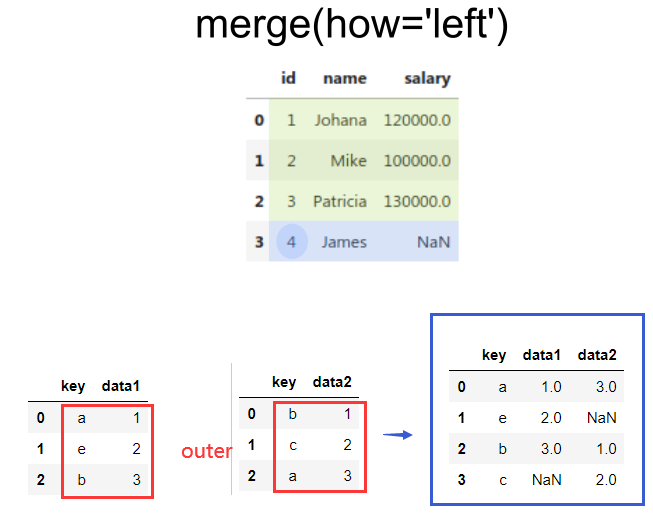

In [13]:
# Later on if you wish you can practice on this df s

# x = pd.DataFrame({'key': ['K0', 'K1', 'K2'],
#                      'A': ['A0', 'A1', 'A2'],
#                      'B': ['B0', 'B1', 'B2']})

# y = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
#                           'C': ['C0', 'C1', 'C2', 'C3'],
#                           'D': ['D0', 'D1', 'D2', 'D3']})

In [8]:
x = pd.DataFrame({'product': ['pants', 'shirt', 'cap','boat'],
                     'Ankara': [3,4,6,0],
                     'Bursa': [0,5,2,8]})

y = pd.DataFrame({'product': ['pants', 'shirt', 'cap','coat'],
                          'Istanbul': [2,1,0,7],
                          'Izmir': [3,2,2,0]})

In [9]:
x

,product,Ankara,Bursa
0,pants,3,0
1,shirt,4,5
2,cap,6,2
3,boat,0,8


In [10]:
y

,product,Istanbul,Izmir
0,pants,2,3
1,shirt,1,2
2,cap,0,2
3,coat,7,0


In [13]:
pd.merge(x,y) 
# as default it makes inner join 
# it gets the common data from both dfs
#it gets the column pants, shirt, and cap
# it ignores boat and coat column

,product,Ankara,Bursa,Istanbul,Izmir
0,pants,3,0,2,3
1,shirt,4,5,1,2
2,cap,6,2,0,2


In [20]:
x

,product,Ankara,Bursa
0,pants,3,0
1,shirt,4,5
2,cap,6,2
3,boat,0,8


In [21]:
y

,product,Istanbul,Izmir
0,pants,2,3
1,shirt,1,2
2,cap,0,2
3,coat,7,0


In [14]:
pd.merge(x, y, how= 'left')
# it gets all the data from left, in this case x
# it gets common data from right, in this case y
# it ignores not common column in y, ignore coat

,product,Ankara,Bursa,Istanbul,Izmir
0,pants,3,0,2.0,3.0
1,shirt,4,5,1.0,2.0
2,cap,6,2,0.0,2.0
3,boat,0,8,NaN,NaN


In [ ]:
pd.merge(x, y, how= 'left',on='product') 
# when you have multiple common fields in your dfs you can use on attr.
# specify which colun you want to merge your daraframes

,product,Ankara,Bursa,Istanbul,Izmir
0,pants,3,0,2.0,3.0
1,shirt,4,5,1.0,2.0
2,cap,6,2,0.0,2.0
3,boat,0,8,NaN,NaN


In [15]:
pd.merge(x, y, how= 'right',on='product') 

,product,Ankara,Bursa,Istanbul,Izmir
0,pants,3.0,0.0,2,3
1,shirt,4.0,5.0,1,2
2,cap,6.0,2.0,0,2
3,coat,NaN,NaN,7,0


In [ ]:
pd.merge(x, y, how='outer',on='product') 
# x,y -> order matters, 

,product,Ankara,Bursa,Istanbul,Izmir
0,boat,0.0,8.0,NaN,NaN
1,cap,6.0,2.0,0.0,2.0
2,coat,NaN,NaN,7.0,0.0
3,pants,3.0,0.0,2.0,3.0
4,shirt,4.0,5.0,1.0,2.0


In [16]:
df1 = pd.DataFrame({'lkey': ['x', 'y', 'z', 'x'],
                    'lvalue': [2, 3, 5, 7]})

df2 = pd.DataFrame({'rkey': ['a', 'x', 'z', 'b'],
                    'rvalue': [7, 8, 9, 10]})

In [27]:
df1

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


In [28]:
df2

,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


In [17]:
pd.merge(df1,df2,how='inner') 
#  No common columns to perform merge on.

MergeError: No common columns to perform merge on. Merge options: left_on=None, right_on=None, left_index=False, right_index=False

In [30]:
df1

,lkey,lvalue
0,x,2
1,y,3
2,z,5
3,x,7


In [31]:
df2

,rkey,rvalue
0,a,7
1,x,8
2,z,9
3,b,10


In [ ]:
pd.merge(df1,df2,how='inner',left_on='lkey',right_on='rkey') 
# this code means -> actually these lkey and rkey fields hold the similar values, they are the same column. 
# But their names are diffferent so here I provide for you, you can merge on these columns
# x, z, x are common data on both lkey ad rkey

,lkey,lvalue,rkey,rvalue
0,x,2,x,8
1,z,5,z,9
2,x,7,x,8


In [33]:
pd.merge(df1,df2,how='left',left_on='lkey',right_on='rkey') 

,lkey,lvalue,rkey,rvalue
0,x,2,x,8.0
1,y,3,NaN,NaN
2,z,5,z,9.0
3,x,7,x,8.0


## <font color='yellow'> <b>join()</b><font color='black'>

**join()** is the process of joining two or more DataFrames based on a specific column.

It is mostly used in SQL-based data processing operations.
 
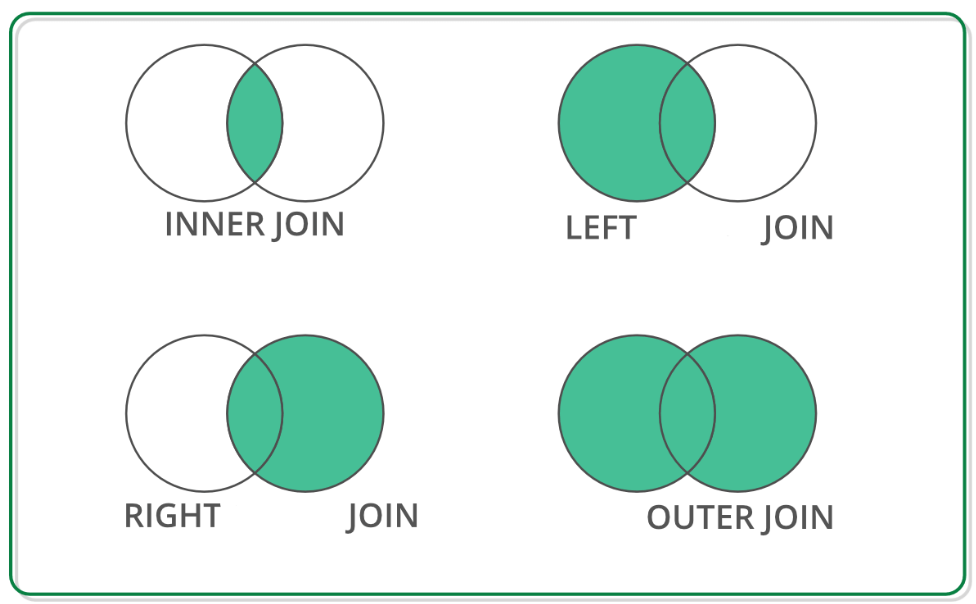

In [18]:
df3 = pd.DataFrame({'A': ['A0', 'A1', 'A2'],
                     'B': ['B0', 'B1', 'B2']},
                      index = ['K0', 'K1', 'K2']) 

df4 = pd.DataFrame({'C': ['C0', 'C2', 'C3'],
                    'D': ['D0', 'D2', 'D3']},
                      index = ['K0', 'K2', 'K3'])

In [35]:
df3

,A,B
K0,A0,B0
K1,A1,B1
K2,A2,B2


In [36]:
df4

,C,D
K0,C0,D0
K2,C2,D2
K3,C3,D3


In [ ]:
df3.join(df4)
# k3 column in df4 is not included
# k1 column in df4 does not exists so it adds NaN

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2


In [20]:
df4.join(df3)

,C,D,A,B
K0,C0,D0,A0,B0
K2,C2,D2,A2,B2
K3,C3,D3,NaN,NaN


In [21]:
df3.join(df4, how='outer') # fully join, no data lose 

,A,B,C,D
K0,A0,B0,C0,D0
K1,A1,B1,NaN,NaN
K2,A2,B2,C2,D2
K3,NaN,NaN,C3,D3


In [22]:
df5 = pd.DataFrame({'key': ['K0', 'K2', 'K3', 'K4', 'K5', 'K6'],
                   'X': ['X0', 'X2', 'X3', 'X4', 'X5', 'X6']})

df6 = pd.DataFrame({'key': ['K0', 'K2', 'K3'],
                      'Y': ['Y0', 'Y2', 'Y3']})

In [43]:
df5

,key,X
0,K0,X0
1,K2,X2
2,K3,X3
3,K4,X4
4,K5,X5
5,K6,X6


In [44]:
df6

,key,Y
0,K0,Y0
1,K2,Y2
2,K3,Y3


In [ ]:
df5.join(df6) 
# ERROR ->Cause we have the same column "key" in both of the data frames
# it overlaps and gives error 

ValueError: columns overlap but no suffix specified: Index(['key'], dtype='object')

In [48]:
df5

,key,X
0,K0,X0
1,K2,X2
2,K3,X3
3,K4,X4
4,K5,X5
5,K6,X6


In [49]:
df6

,key,Y
0,K0,Y0
1,K2,Y2
2,K3,Y3


In [ ]:
# solution to join dataframes that have same column name
# By adding suffix to one of df s field name , we solved the problem , we renamed the column
df5.join(df6, lsuffix='_left')

,key_left,X,key,Y
0,K0,X0,K0,Y0
1,K2,X2,K2,Y2
2,K3,X3,K3,Y3
3,K4,X4,NaN,NaN
4,K5,X5,NaN,NaN
5,K6,X6,NaN,NaN


In [23]:
df5.join(df6, lsuffix='_left', rsuffix='_right')

,key_left,X,key_right,Y
0,K0,X0,K0,Y0
1,K2,X2,K2,Y2
2,K3,X3,K3,Y3
3,K4,X4,NaN,NaN
4,K5,X5,NaN,NaN
5,K6,X6,NaN,NaN


- concat function
    - no need to have a common field 
    - We can use axis 0 or axis 1

- merge function 
    - a common field, it only merges on axis 1

- join 
    - we used row indexes to merge either left or right or outer
    - there shouldnt be a common field, if we have it, we rename the column